Dataset: Wastewater Treatment Plant Dataset

The dataset contains daily measurements from a full-scale wastewater treatment plant, including various physicochemical properties that help assess plant performance. The dataset can be used to analyse the plant's operational effectiveness and predict potential faults. Dataset Link : https://www.kaggle.com/datasets/d4rklucif3r/full-scale-waste-water-treatment-plant-data

The objective is to build a machine learning model that predicts whether the wastewater treatment process is operating optimally based on daily measurements of the plant's operational data.

In [1]:
##import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
##import dataset
df = pd.read_csv('Data-Melbourne_F_fixed.csv')
df.head()

,Unnamed: 0,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,0,2.941,2.589,175856.0,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56.0,1.52,10.0,26.9,53.5,2014.0,1.0,1.0
1,1,2.936,2.961,181624.0,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63.0,0.00,10.0,14.4,27.8,2014.0,1.0,2.0
2,2,2.928,3.225,202016.0,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47.0,0.25,10.0,31.9,61.1,2014.0,1.0,5.0
3,3,2.928,3.354,207547.0,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49.0,0.00,10.0,27.0,38.9,2014.0,1.0,6.0
4,4,2.917,3.794,202824.0,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65.0,0.00,10.0,20.6,35.2,2014.0,1.0,7.0


In [3]:
##drop unnamed: 0 column
df = df.drop(['Unnamed: 0'] , axis = 1)

1. Data Preprocessing:

Perform comprehensive data preprocessing, including handling missing values, scaling, and feature selection, while visualizing key trends and correlations to enhance data insights and model performance.

In [4]:
##check for null values
df.isnull().sum()

Average Outflow             0
Average Inflow              0
Energy Consumption          0
Ammonia                     0
Biological Oxygen Demand    0
Chemical Oxygen Demand      0
Total Nitrogen              0
Average Temperature         0
Maximum temperature         0
Minimum temperature         0
Atmospheric pressure        0
Average humidity            0
Total rainfall              0
Average visibility          0
Average wind speed          0
Maximum wind speed          0
Year                        0
Month                       0
Day                         0
dtype: int64

In [5]:
##statiscal values
df.describe()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,3.930608,4.506338,275159.089001,39.222302,382.061708,845.960434,62.740752,15.036686,20.530897,10.037337,3.675036,63.558611,0.218090,9.101592,19.482706,35.381259,2016.258321,6.184515,15.584660
std,1.228778,1.439583,44640.533689,7.761598,85.996012,145.416540,3.571035,5.398491,7.096760,4.656887,61.010416,14.534205,1.306923,16.322905,7.136868,11.626362,1.583491,3.410588,8.741422
min,0.000004,2.589000,116638.000000,13.000000,140.000000,360.000000,40.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,3.074500,3.643250,246435.750000,34.000000,330.000000,751.250000,61.396000,10.800000,15.000000,6.800000,0.000000,55.000000,0.000000,8.400000,14.400000,27.800000,2015.000000,3.000000,8.000000
50%,3.701000,4.161500,275808.000000,39.000000,360.000000,845.000000,62.957500,14.300000,19.200000,9.600000,0.000000,66.000000,0.000000,10.000000,18.100000,33.500000,2016.000000,6.000000,15.000000
75%,4.498750,4.847750,305703.750000,44.000000,422.980000,920.000000,64.366000,18.575000,25.200000,13.000000,0.000000,74.000000,0.000000,10.000000,23.300000,42.400000,2018.000000,9.000000,23.000000
max,7.920000,18.968000,398328.000000,93.000000,850.000000,1700.000000,92.000000,35.500000,43.500000,28.500000,1022.000000,97.000000,18.030000,512.000000,49.100000,83.500000,2019.000000,12.000000,31.000000


In [6]:
## Converting Wh to MWh
df['Energy Consumption'] = round(df['Energy Consumption'] / 1000, 1) 

In [7]:
##check value counts for atmospheric pressure
df['Atmospheric pressure'].value_counts()

Atmospheric pressure
0.0       1377
1015.7       1
1013.2       1
1010.5       1
1022.0       1
1017.5       1
Name: count, dtype: int64

In [8]:
##As dataset shape is (1382 , 16) , in atmospheric pressure almost 99% values is 0 . so we drop this column 
df.drop(['Atmospheric pressure'] , axis = 1 , inplace = True)

***FEATURE ENGINEERING***

In [9]:
df['temperature_range'] = df['Maximum temperature'] - df['Minimum temperature']

df['BOD:COD'] = df['Biological Oxygen Demand'] / df['Chemical Oxygen Demand']

***VISUALIZATION***

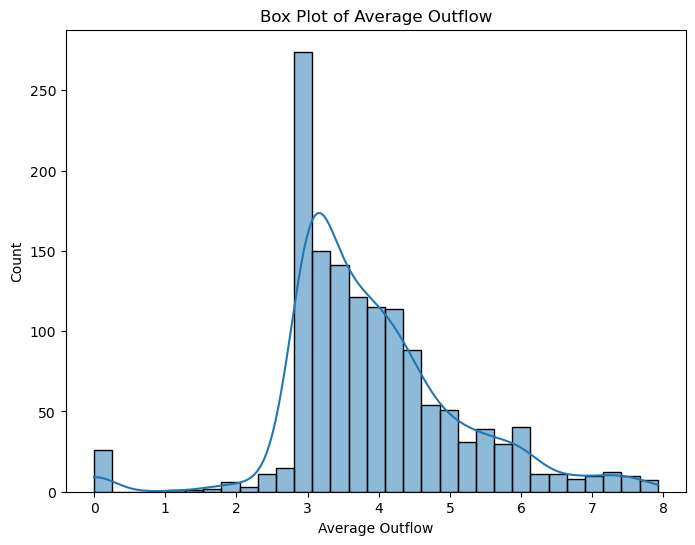

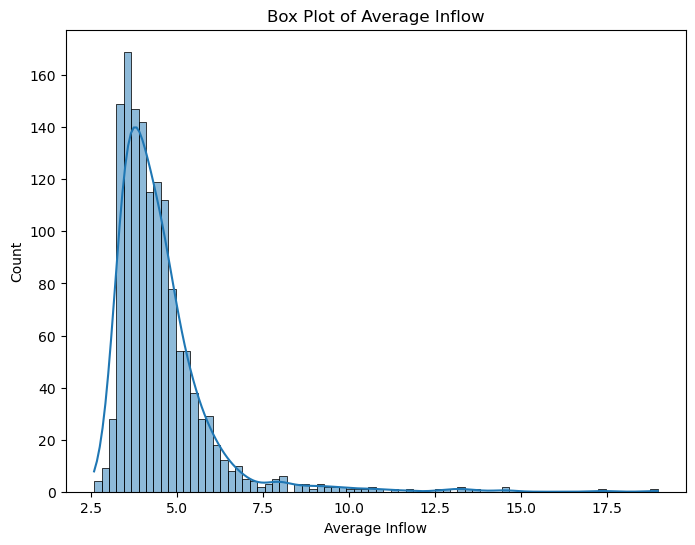

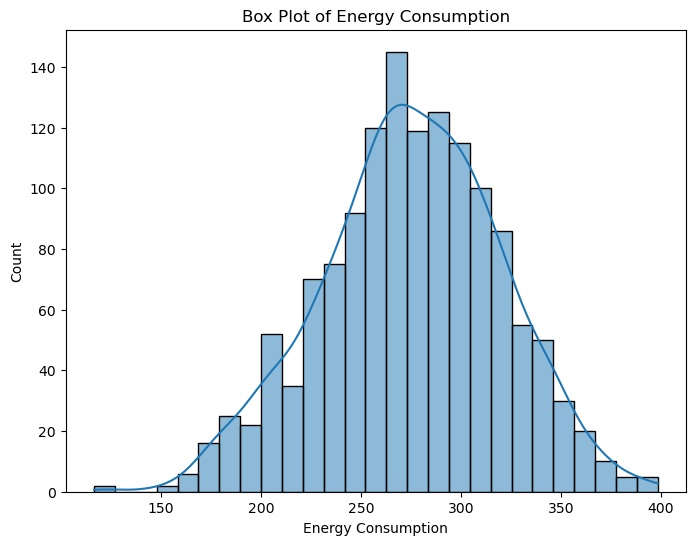

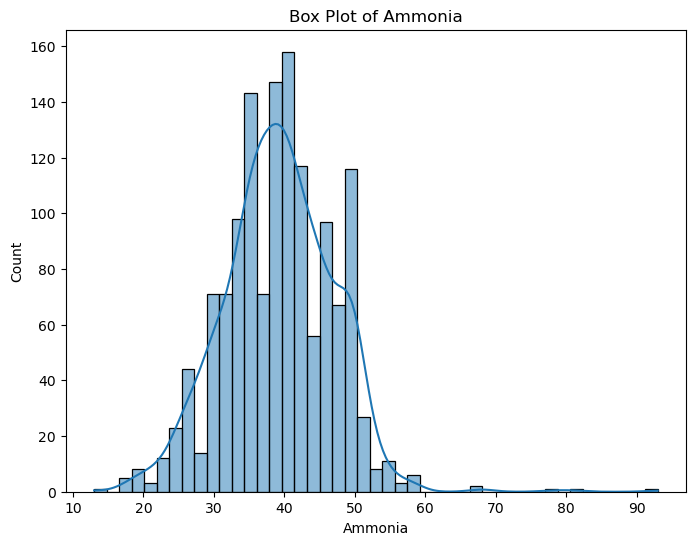

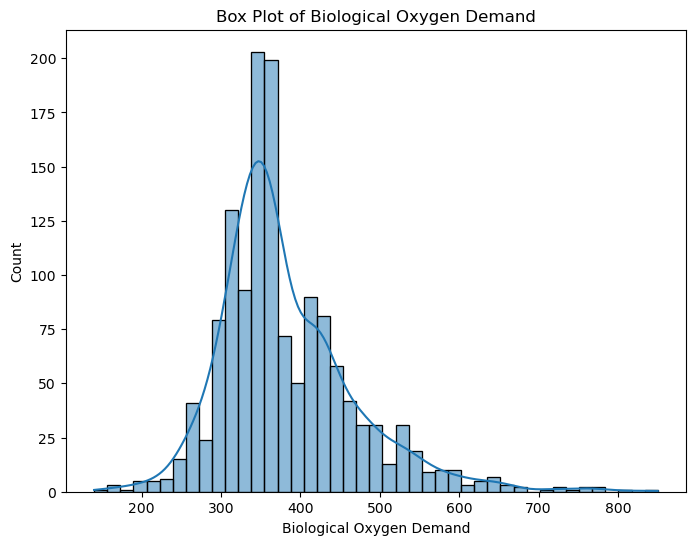

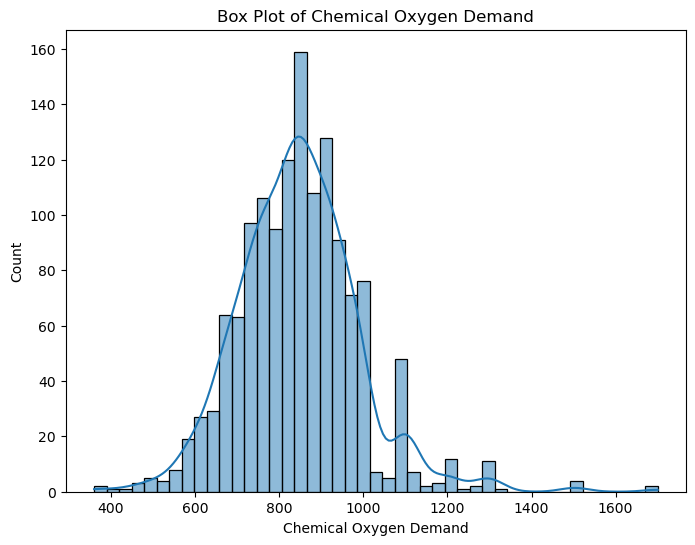

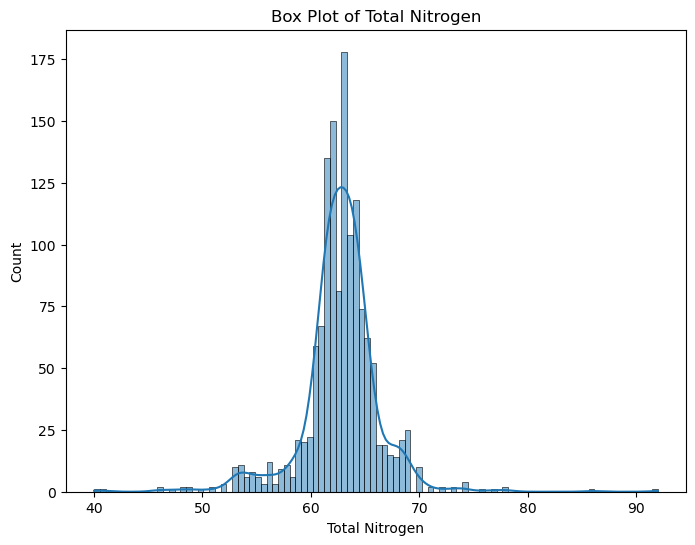

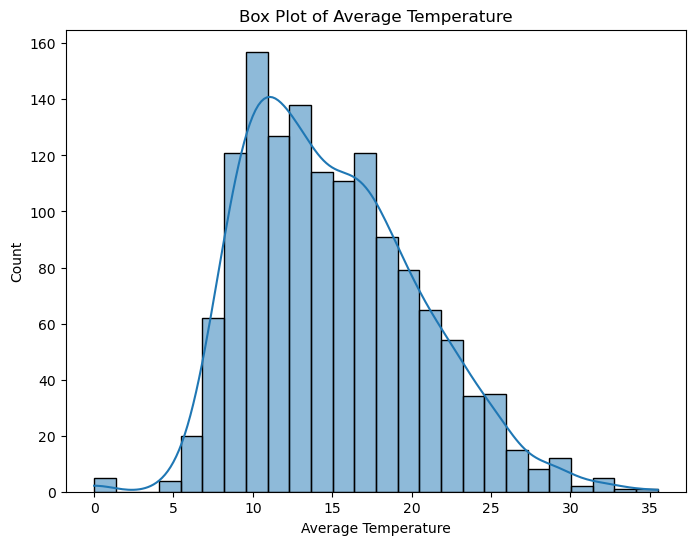

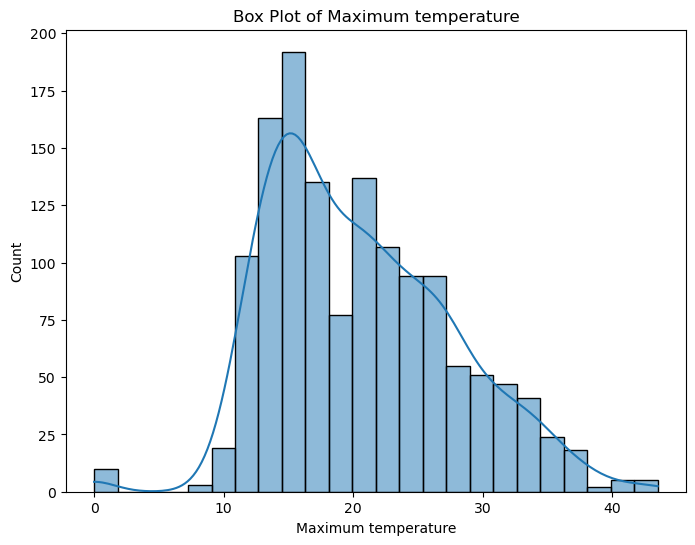

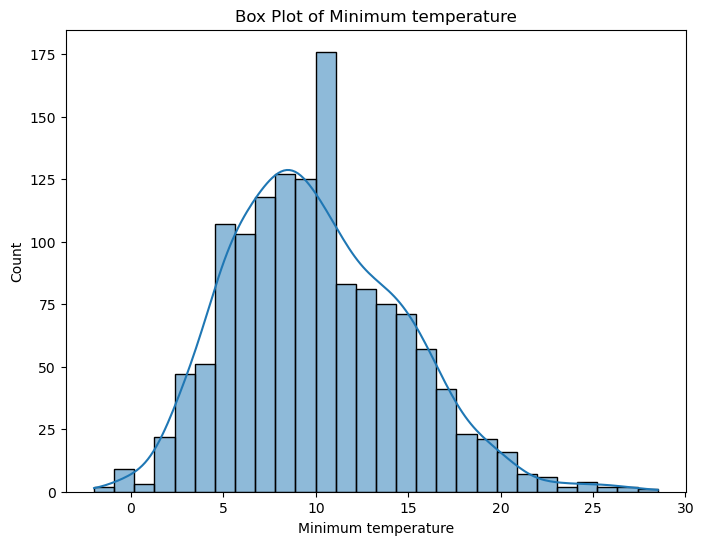

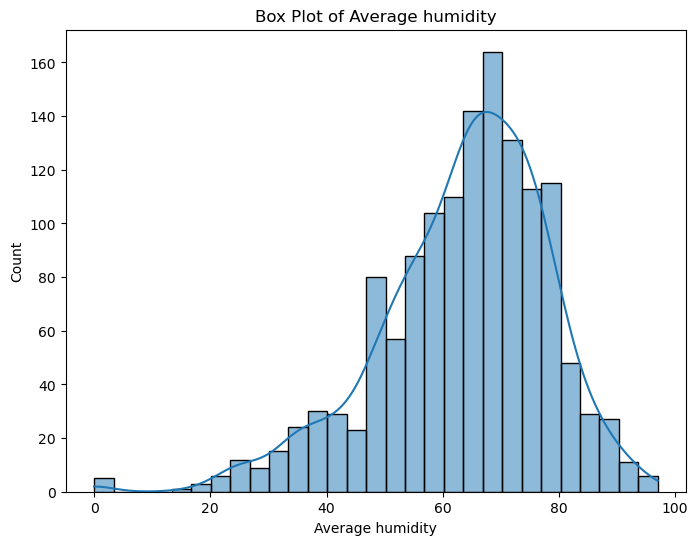

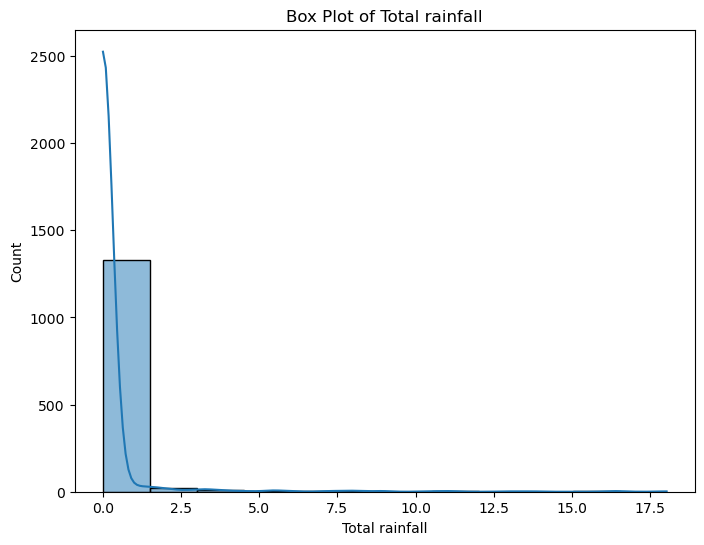

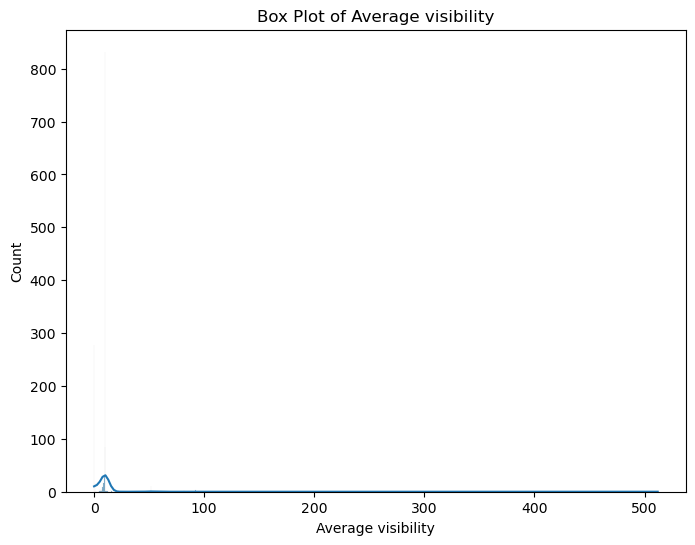

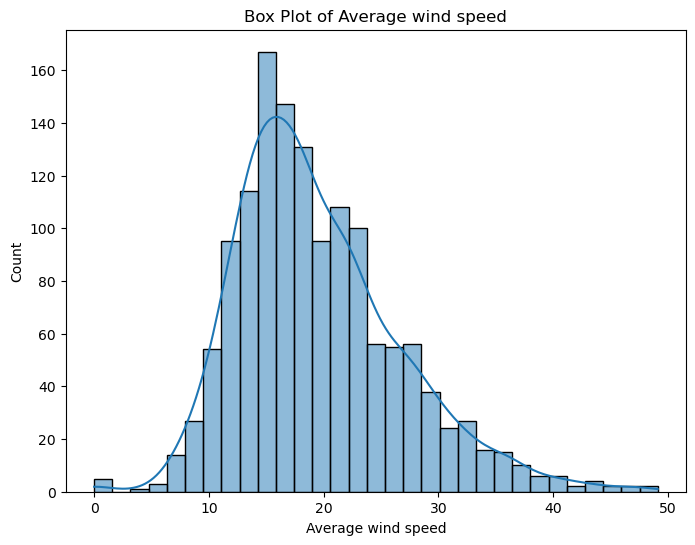

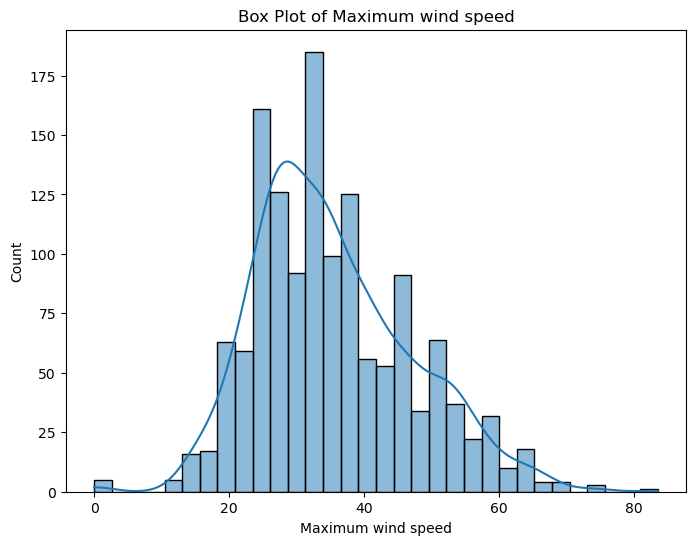

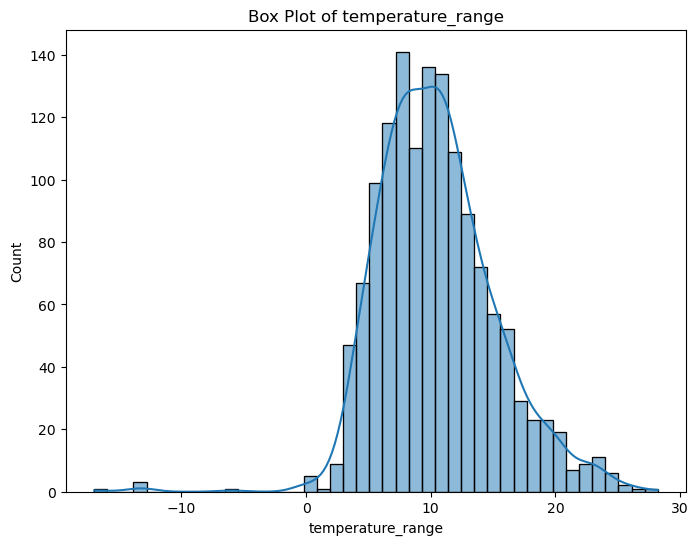

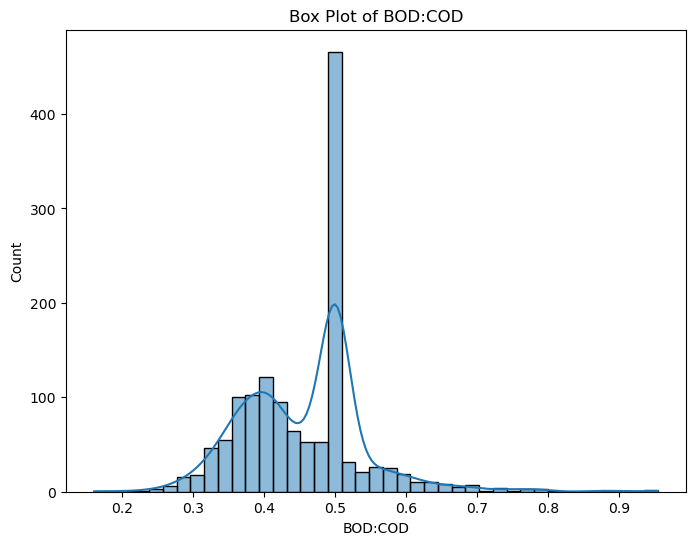

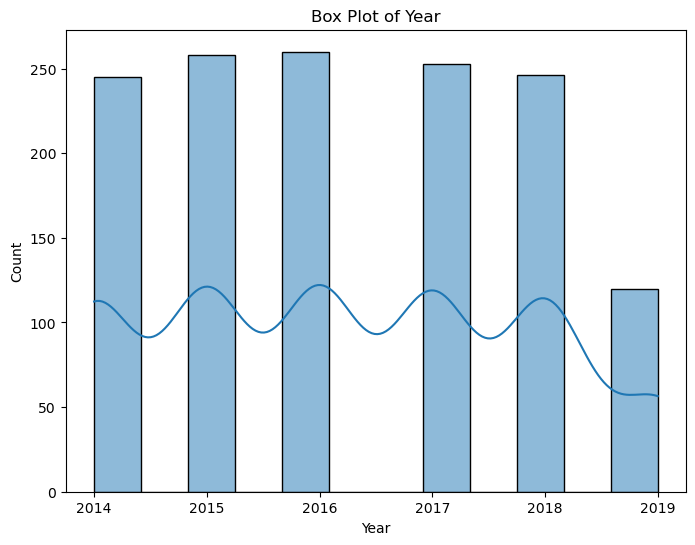

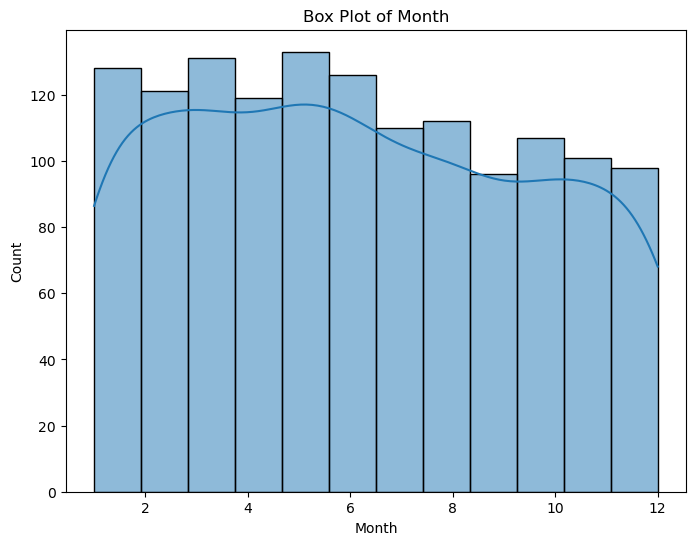

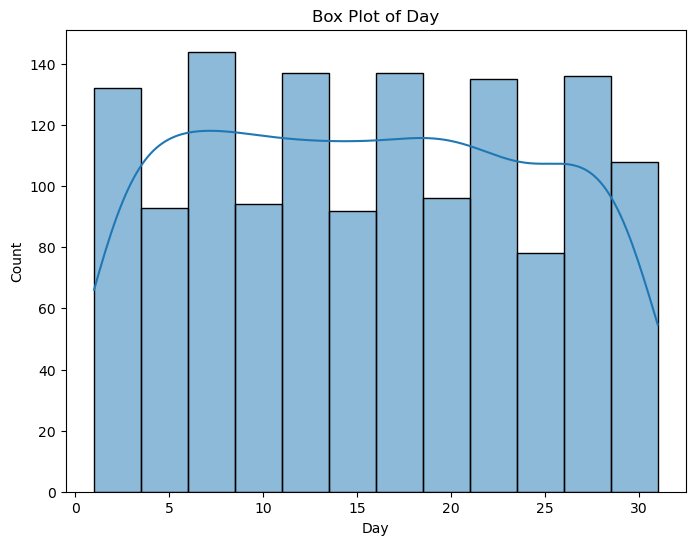

In [10]:
numeric_values = [
    'Average Outflow',
    'Average Inflow',
    'Energy Consumption',
    'Ammonia',
    'Biological Oxygen Demand' ,
    'Chemical Oxygen Demand',
    'Total Nitrogen',
    'Average Temperature',
    'Maximum temperature',
    'Minimum temperature',
    'Average humidity',
    'Total rainfall',
    'Average visibility',
    'Average wind speed',
    'Maximum wind speed',
    'temperature_range',
    'BOD:COD',
    'Year',
    'Month',
    'Day'
]


for col in numeric_values:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col , kde = True)
    plt.title(f'Box Plot of {col}')
    plt.show()

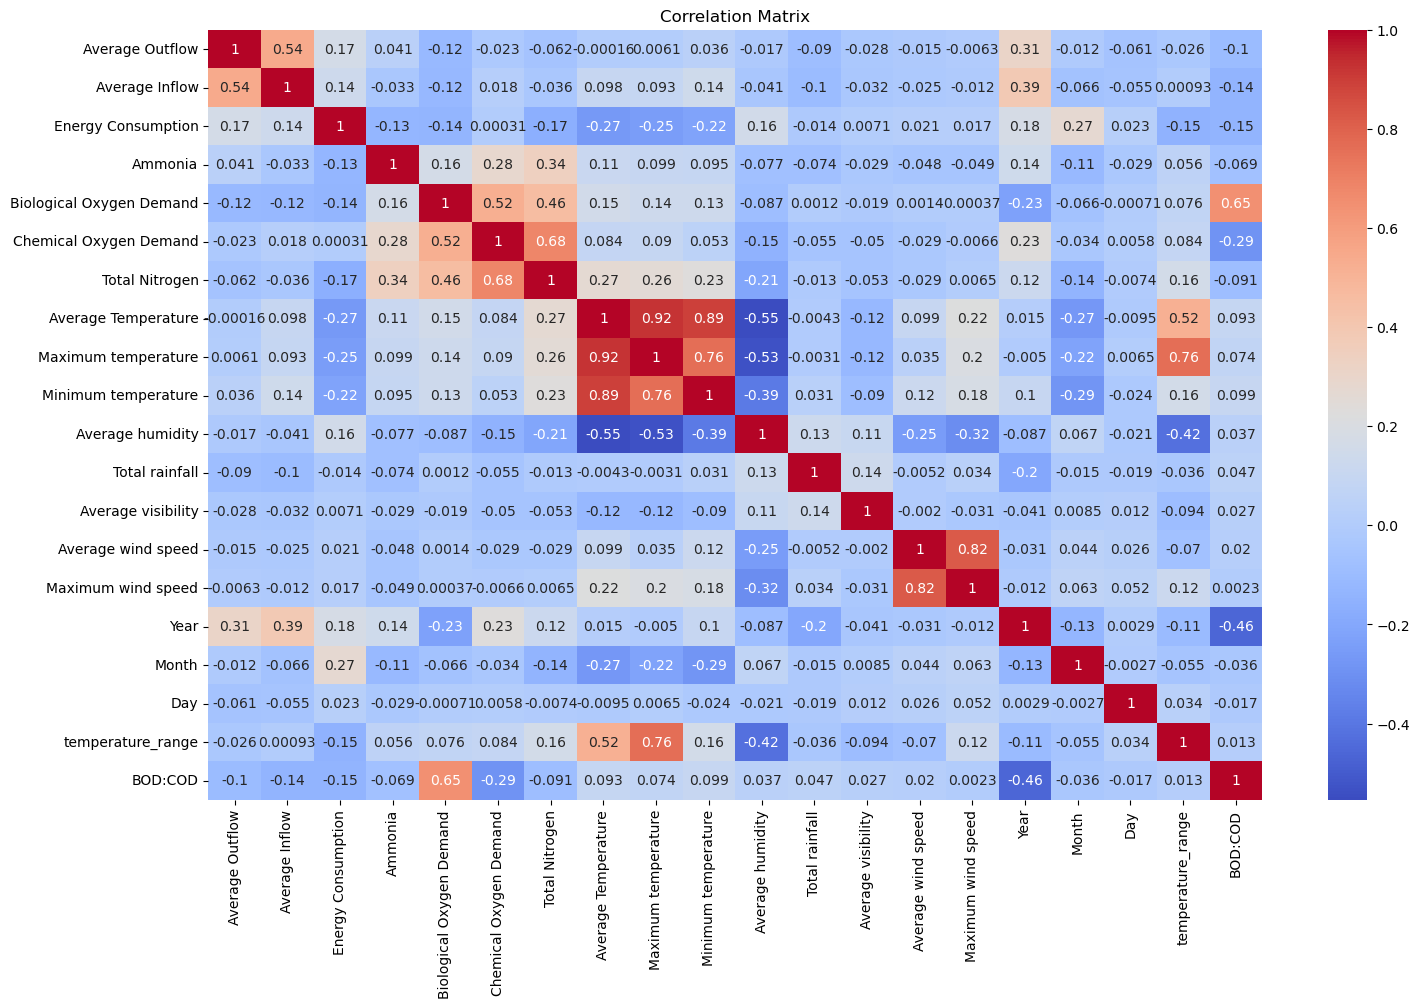

In [11]:
##correaltion matrix
correlation_matrix = df.corr()
plt.figure(figsize=(17, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

2. Modeling with Machine Learning Algorithms:

Apply various machine learning algorithms to classify the operational state of the wastewater treatment process. Use the following algorithms:

o Logistic Regression from scratch as well as from sklearn

o K-Nearest Neighbours (KNN)

o Decision Tree Classifier

o Random Forest Classifier

o Support Vector Machine (SVM)

o Any other relevant algorithms you feel might improve performance.

***TAKING BOD AS A TARGET***

In [12]:
##copying the dataset
new_df = df.copy()

In [13]:
bod_threshold = new_df['Biological Oxygen Demand'].mean()
new_df['target_bod'] = new_df['Biological Oxygen Demand'].apply(lambda x : 1 if x > bod_threshold else 0)

In [14]:
##set x and y 
x_bod = new_df.drop(['target_bod' , 'Biological Oxygen Demand'] , axis = 1)
y_bod = new_df['target_bod']

In [15]:
##splitting the data 
x_train , x_test , y_train , y_test = train_test_split(x_bod, y_bod , random_state = 42 , test_size = 0.2)

In [16]:
##normalization x 
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

In [17]:
##manual logistic regression

class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0
        y = y.values
        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)
            dw = (1 / self.m) * np.dot(X.T, (predictions - y))
            db = (1 / self.m) * np.sum(predictions - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]


# Instantiate the Logistic Regression class
model = LogisticRegressionScratch(lr=0.01, epochs=1000)

# Train the model
model.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred_manual = model.predict(x_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_manual)
f1 = f1_score(y_test, y_pred_manual)
conf_matrix = confusion_matrix(y_test, y_pred_manual)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.90
F1 Score: 0.87
Confusion Matrix:
[[152  12]
 [ 17  96]]


In [18]:
# Define models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "XG Boost" : XGBClassifier()
}


# Iterate through models
results = []
for model_name, model in models.items():
    # Train the model
    model.fit(x_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)  # Change to "micro" for multiclass
    cm = confusion_matrix(y_test, y_pred)
    
    # Store the results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "F1-Score": f1,
        "Confusion Matrix": cm
    })

# Print results
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print(f"F1-Score: {result['F1-Score']:.2f}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}\n")

Model: Logistic Regression
Accuracy: 0.97
F1-Score: 0.96
Confusion Matrix:
[[160   4]
 [  5 108]]

Model: K-Nearest Neighbors
Accuracy: 0.80
F1-Score: 0.73
Confusion Matrix:
[[149  15]
 [ 40  73]]

Model: Decision Tree
Accuracy: 0.97
F1-Score: 0.96
Confusion Matrix:
[[162   2]
 [  6 107]]

Model: Random Forest
Accuracy: 0.94
F1-Score: 0.92
Confusion Matrix:
[[162   2]
 [ 16  97]]

Model: Support Vector Machine
Accuracy: 0.94
F1-Score: 0.92
Confusion Matrix:
[[163   1]
 [ 15  98]]

Model: XG Boost
Accuracy: 0.96
F1-Score: 0.95
Confusion Matrix:
[[161   3]
 [  7 106]]



3. Model Evaluation:

Evaluate and compare models using accuracy, F1-score, and confusion matrix, and perform hyperparameter tuning to optimize performance on the test dataset.

In [19]:
# Perform Hypertuning 
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search_rf.fit(x_train_scaled, y_train)

print(f"Best Parameters: {grid_search_rf.best_params_}")
best_rf = grid_search_rf.best_estimator_
Y_pred_rf_tuned = best_rf.predict(x_test_scaled)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


***TAKING COD AS A TARGET***

2. Modeling with Machine Learning Algorithms:

Apply various machine learning algorithms to classify the operational state of the wastewater treatment process. Use the following algorithms:

o Logistic Regression from scratch as well as from sklearn

o K-Nearest Neighbours (KNN)

o Decision Tree Classifier

o Random Forest Classifier

o Support Vector Machine (SVM)

o Any other relevant algorithms you feel might improve performance.

In [20]:
cod_threshold = df['Chemical Oxygen Demand'].mean()
df['target_cod'] = df['Chemical Oxygen Demand'].apply(lambda x : 1 if x > cod_threshold else 0)

In [21]:
##set x and y 
x_cod = df.drop(['target_cod' , 'Chemical Oxygen Demand'] , axis = 1)
y_cod = df['target_cod']

In [22]:
##splitting the data 
x_train , x_test , y_train , y_test = train_test_split(x_cod, y_cod, random_state = 42 , test_size = 0.2)

In [23]:
##normalization x 
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

In [24]:
# Instantiate the Logistic Regression class
model = LogisticRegressionScratch(lr=0.01, epochs=1000)

# Train the model
model.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred_manual = model.predict(x_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_manual)
f1 = f1_score(y_test, y_pred_manual)
conf_matrix = confusion_matrix(y_test, y_pred_manual)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.85
F1 Score: 0.86
Confusion Matrix:
[[110  27]
 [ 15 125]]


In [25]:
# Iterate through models
results = []
for model_name, model in models.items():
    # Train the model
    model.fit(x_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)  
    cm = confusion_matrix(y_test, y_pred)
    
    # Store the results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "F1-Score": f1,
        "Confusion Matrix": cm
    })

# Print results
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print(f"F1-Score: {result['F1-Score']:.2f}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}\n")

Model: Logistic Regression
Accuracy: 0.96
F1-Score: 0.96
Confusion Matrix:
[[133   4]
 [  8 132]]

Model: K-Nearest Neighbors
Accuracy: 0.78
F1-Score: 0.77
Confusion Matrix:
[[114  23]
 [ 39 101]]

Model: Decision Tree
Accuracy: 0.91
F1-Score: 0.90
Confusion Matrix:
[[130   7]
 [ 19 121]]

Model: Random Forest
Accuracy: 0.93
F1-Score: 0.93
Confusion Matrix:
[[128   9]
 [ 10 130]]

Model: Support Vector Machine
Accuracy: 0.91
F1-Score: 0.91
Confusion Matrix:
[[124  13]
 [ 11 129]]

Model: XG Boost
Accuracy: 0.94
F1-Score: 0.94
Confusion Matrix:
[[131   6]
 [ 10 130]]



3. Model Evaluation:

Evaluate and compare models using accuracy, F1-score, and confusion matrix, and perform hyperparameter tuning to optimize performance on the test dataset.

In [26]:
# Perform Hypertuning 
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search_rf.fit(x_train_scaled, y_train)

print(f"Best Parameters: {grid_search_rf.best_params_}")
best_rf = grid_search_rf.best_estimator_
Y_pred_rf_tuned = best_rf.predict(x_test_scaled)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
